In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
closed_deals = pd.read_csv(r"******Python_Project\olist_closed_deals_dataset.csv")
mql = pd.read_csv(r"***Python_Project\olist_marketing_qualified_leads_dataset.csv")

# Merge Datasets
data = mql.merge(closed_deals, on="mql_id", how="left")

# Convert dates to datetime objects
data["first_contact_date"] = pd.to_datetime(data["first_contact_date"])
data["won_date"] = pd.to_datetime(data["won_date"],dayfirst=True)

# Calculate days to convert
data["days_to_convert"] = (data["won_date"] - data["first_contact_date"]).dt.days

In [7]:
# Display the merged data
data.head()

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,days_to_convert
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:00,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,5.0


 # 1.1 Marketing Channel Effectiveness: Leads


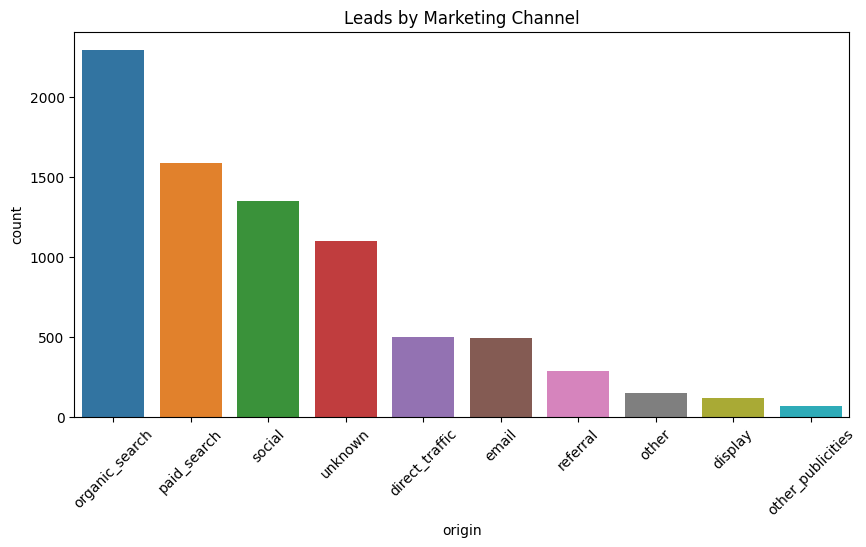

In [8]:
plt.figure(figsize= (10,5))
sns.countplot(data=data, x="origin", order=data["origin"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Leads by Marketing Channel")
plt.show()

# 1.2 Marketing Channel Effectiveness: Converts

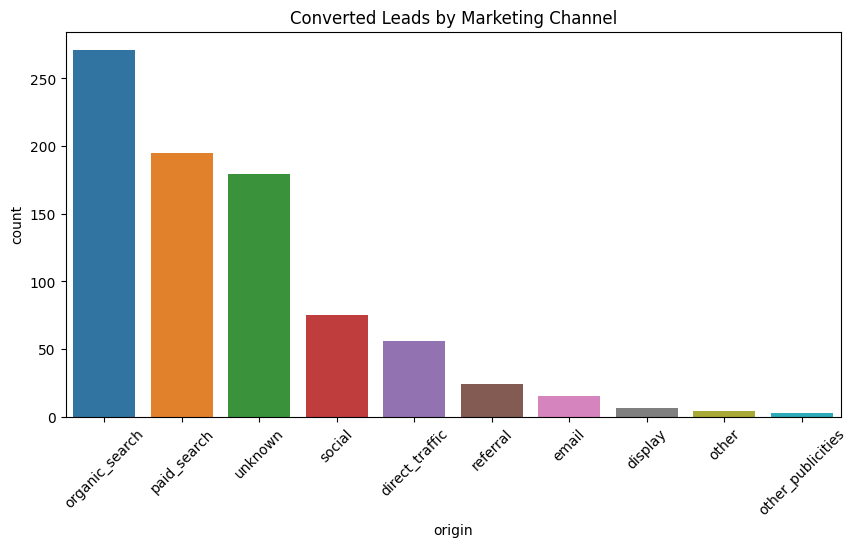

In [9]:
# Filter the data to include only converted leads
converted_data = data[data["won_date"].notnull()]

# Plot the countplot for converted leads by marketing channel
plt.figure(figsize= (10,5))
sns.countplot(data=converted_data, x="origin",order=converted_data["origin"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Converted Leads by Marketing Channel")
plt.show()

# 1.3 Marketing Channel Effectiveness: Conversion Rate

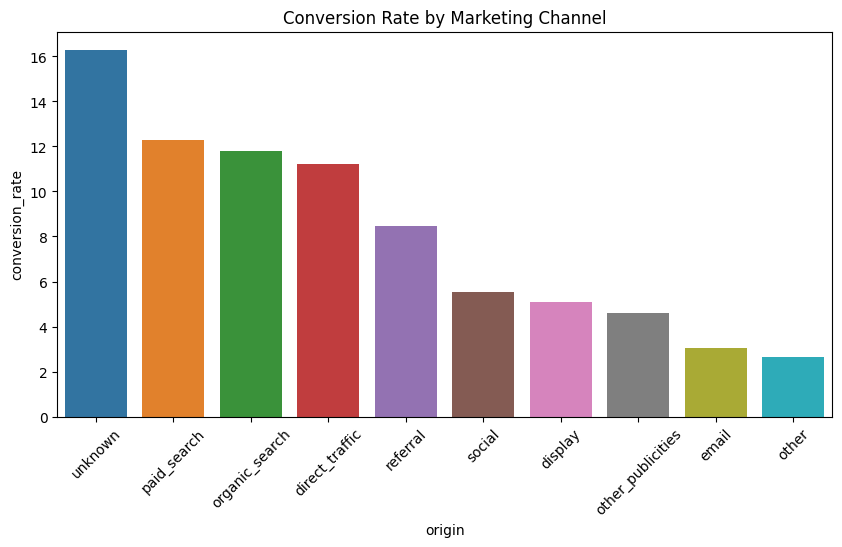

In [10]:
# Count the leads by marketing channel
leads_by_channel = data["origin"].value_counts()

# Count the converted leads by marketing channel
converted_leads_by_channel = converted_data["origin"].value_counts()

# Calculate the conversion rate by marketing channel
conversion_rate_by_channel = (converted_leads_by_channel / leads_by_channel) * 100

# Reset index and rename columns
conversion_rate_by_channel = conversion_rate_by_channel.reset_index()
conversion_rate_by_channel.columns = ['origin', 'conversion_rate']

# Plot the conversion rate by marketing channel
plt.figure(figsize= (10,5))
sns.barplot(data=conversion_rate_by_channel, x="origin", y="conversion_rate", order=conversion_rate_by_channel.sort_values("conversion_rate", ascending=False)["origin"])
plt.xticks(rotation=45)
plt.title("Conversion Rate by Marketing Channel")
plt.show()

# 2.1 MQL Customer Persona: Lead Profile Count

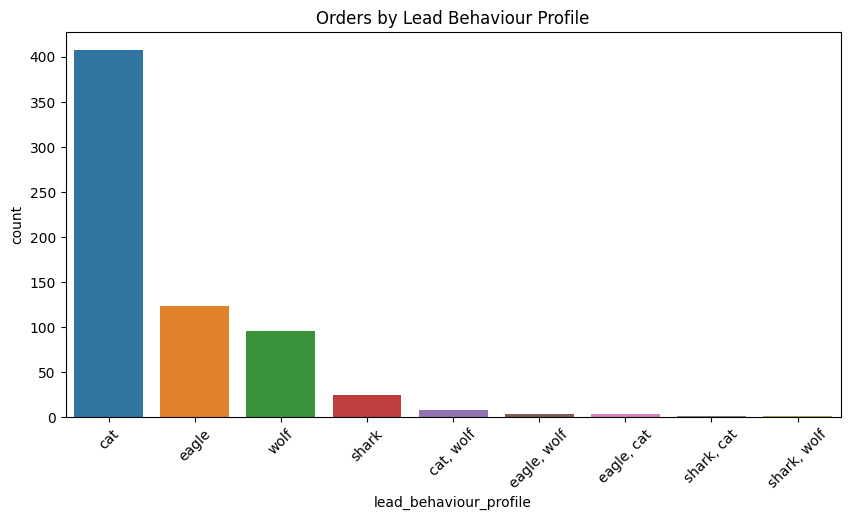

In [59]:
# Who orders more?
plt.figure(figsize= (10,5))
sns.countplot(data=data, x="lead_behaviour_profile",order=converted_data["lead_behaviour_profile"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Orders by Lead Behaviour Profile")
plt.show()

# Who pays more? - Since the payment data is not available in this dataset, we cannot calculate the payment by each lead.

In [45]:
# Average days_to_convert
avg_days_to_convert = int(data["days_to_convert"].mean())
print(f"Average days to convert: {avg_days_to_convert} days")

Average days to convert: 48 days


# 2.2 MQL Customer Persona: Lead Profile by Business segment

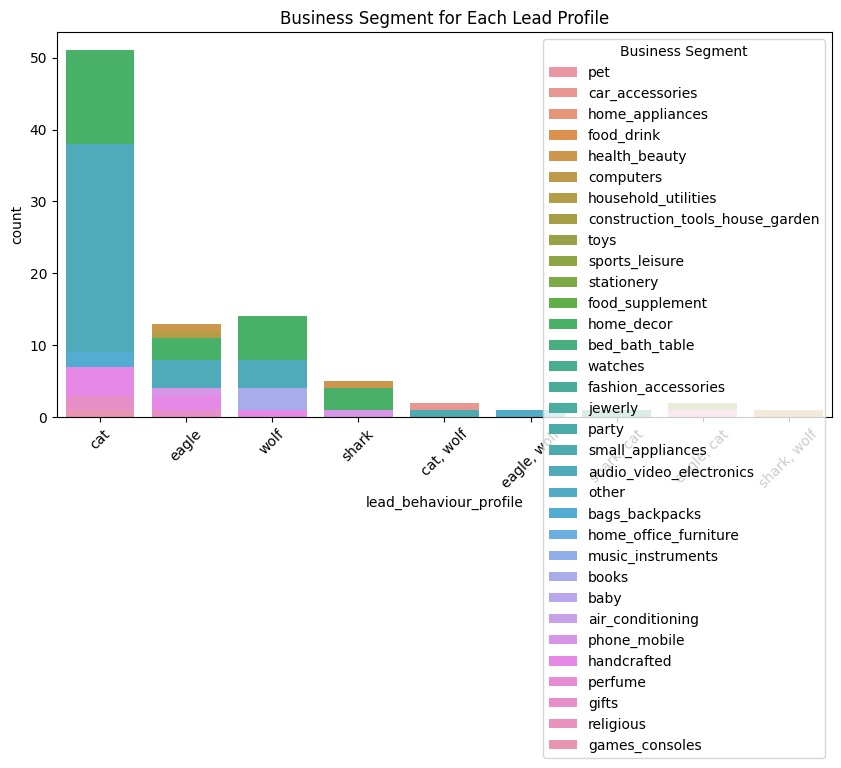

In [81]:
plt.figure(figsize= (10,5))
sns.countplot(data=data, x="lead_behaviour_profile",hue = "business_segment", dodge = False)
plt.xticks(rotation=45)
plt.title("Business Segment for Each Lead Profile")
plt.legend(loc="upper right", title = "Business Segment",)
plt.show()

# 3.1 Won Customer Persona: Sales won per month

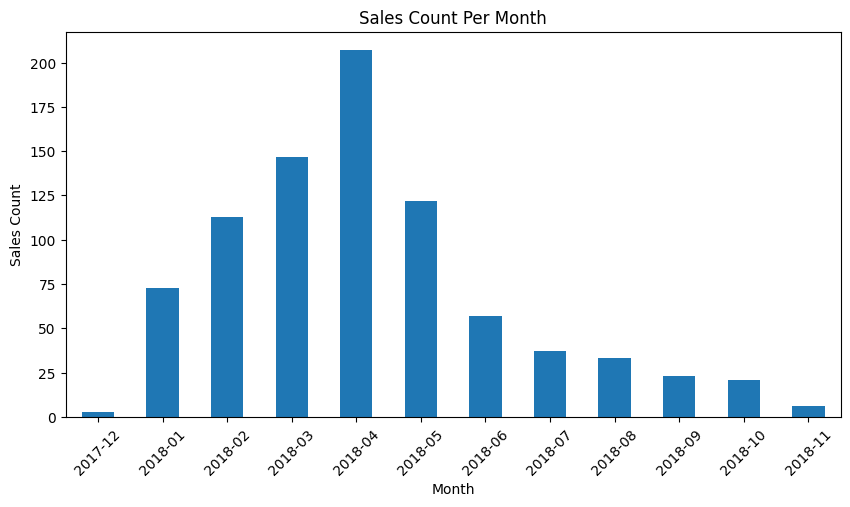

In [101]:
data["won_month"] = data["won_date"].dt.to_period("M")
sales_count = data["won_month"].value_counts().sort_index()
sales_count.plot(kind= "bar", figsize= (10,5))
plt.title("Sales Count Per Month")
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.xticks(rotation=45)
plt.show()

# 4.1 Top landing pages by frequency

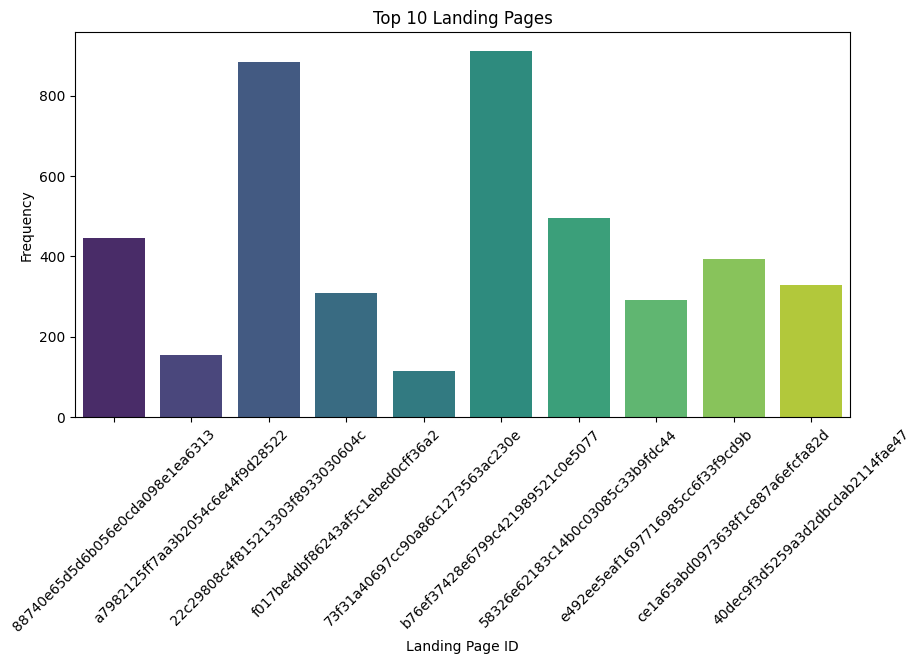

In [109]:
# Filter dataset to only include top 10 landing pages
top_landing_pages = data["landing_page_id"].value_counts().head(10).index
filtered_data = data[data["landing_page_id"].isin(top_landing_pages)]

plt.figure(figsize= (10,5))
sns.countplot(data=filtered_data, x="landing_page_id", palette = "viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Landing Pages")
plt.xlabel('Landing Page ID')
plt.ylabel('Frequency')
plt.show()

# 4.2  Landing page distribution by lead origin

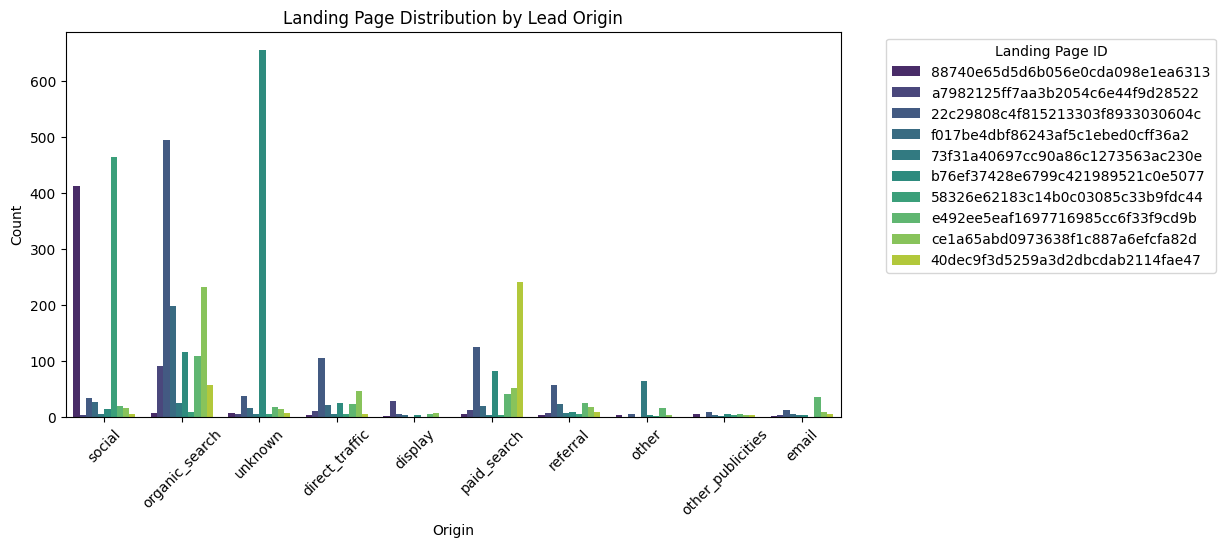

In [113]:
plt.figure(figsize= (10,5))
sns.countplot(data=filtered_data, x="origin", hue = "landing_page_id", palette='viridis')
plt.xticks(rotation=45)
plt.title("Landing Page Distribution by Lead Origin")
plt.xlabel('Origin')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Landing Page ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.show()

# 4.3 Landing page distribution by lead type

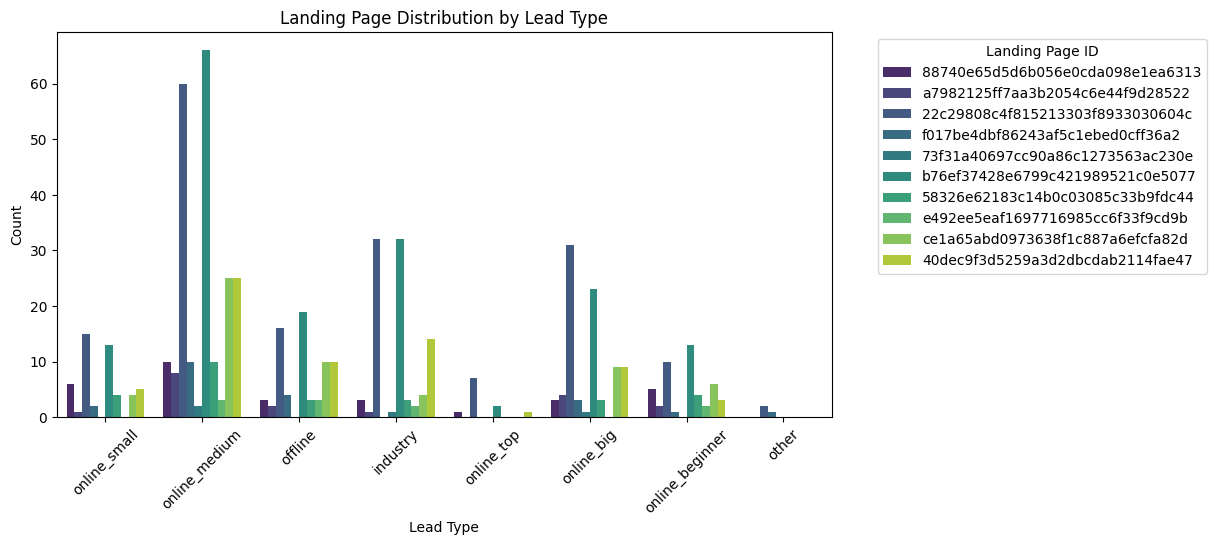

In [114]:
plt.figure(figsize= (10,5))
sns.countplot(data=filtered_data, x="lead_type", hue = "landing_page_id", palette='viridis')
plt.xticks(rotation=45)
plt.title("Landing Page Distribution by Lead Type")
plt.xlabel('Lead Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Landing Page ID', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.show()

# 5.1 Most common business types

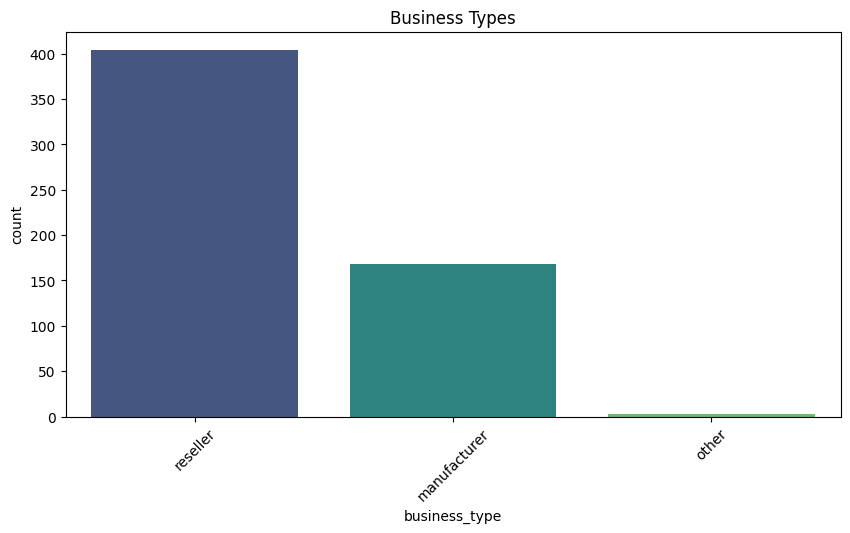

In [123]:
plt.figure(figsize= (10,5))
sns.countplot(data=filtered_data, x="business_type", palette='viridis')
plt.title("Business Types")
plt.xticks(rotation=45)
plt.show()